# Import

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import rcParams

# Load Data

In [1]:
path = '/home/rgur/efrc/prep_data/all_v1/ml_data.csv'

In [4]:
fp_df = pd.read_csv(path, index_col=0)

/home/modules/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
for i in fp_df.keys():
    print(i)

#_of_Linkers
L0_Smiles
L10_Smiles
L11_Smiles
L12_Smiles
L13_Smiles
L14_Smiles
L15_Smiles
L16_Smiles
L17_Smiles
L18_Smiles
L19_Smiles
L1_Smiles
L2_Smiles
L3_Smiles
L4_Smiles
L5_Smiles
L6_Smiles
L7_Smiles
L8_Smiles
L9_Smiles
Metal_ID
filename
Mafp_Br1_C2_C1
Mafp_Br1_C2_C2
Mafp_Br1_C2_C3
Mafp_Br1_C3_Br1
Mafp_Br1_C3_C1
Mafp_Br1_C3_C2
Mafp_Br1_C3_C3
Mafp_Br1_C3_C4
Mafp_Br1_C3_N1
Mafp_Br1_C3_N2
Mafp_Br1_C3_N3
Mafp_Br1_C3_O1
Mafp_Br1_C4_Br1
Mafp_Br1_C4_C2
Mafp_Br1_C4_C3
Mafp_Br1_C4_C4
Mafp_Br1_C4_H1
Mafp_Br1_C4_N1
Mafp_Br1_C4_N2
Mafp_Br1_C4_N3
Mafp_Br1_C4_O1
Mafp_Br1_C4_O2
Mafp_Br1_N2_C2
Mafp_Br1_N2_C3
Mafp_Br1_N2_C4
Mafp_Br1_N2_N1
Mafp_Br1_N2_N2
Mafp_Br1_N2_N3
Mafp_Br1_N3_Br1
Mafp_Br1_N3_C2
Mafp_Br1_N3_C3
Mafp_Br1_N3_H1
Mafp_Br1_N3_N2
Mafp_Br1_N3_O2
Mafp_Br1_O2_C2
Mafp_Br1_O2_C3
Mafp_Br1_O2_C4
Mafp_C1_C2_C2
Mafp_C1_C2_C3
Mafp_C1_C2_C4
Mafp_C1_C2_F1
Mafp_C1_C2_H1
Mafp_C1_C2_O1
Mafp_C1_C2_O2
Mafp_C1_C3_C2
Mafp_C1_C3_C3
Mafp_C1_C3_C4
Mafp_C1_C3_Cl1
Mafp_C1_C3_F1
Mafp_C1_C3_H1
Mafp_C1_C3_N2
Mafp

In [6]:
fp_key_for_coloring = 'norm_CH4_v/v_1_bar'

start_str = 'filename'
end_str = 'valence_pa'

# Write functions

In [13]:
for ind,col in enumerate(fp_df.columns):
    if start_str == col:
        start_col = ind + 1
    elif end_str == col:
        end_col = ind

In [14]:
other_props = ['norm_Dom._Pore_(ang.)',
 'norm_Max._Pore_(ang.)',
 'norm_Void_Fraction',
 'norm_Surf._Area_(m2/g)',
 'norm_Vol._Surf._Area',
 'norm_Density',
  'norm_valence_pa',
   'norm_atomic_rad_pa_(angstroms)',
     'norm_affinity_pa_(eV)',
       'norm_ionization_potential_pa_(eV)',
           'norm_electronegativity_pa']

In [15]:
X_heads = list(fp_df.columns[start_col:end_col]) + other_props

In [16]:
try:
    C = fp_df[fp_key_for_coloring]
except:
    pass

In [17]:
for i in X_heads:
    print(i)

Mafp_Br1_C2_C1
Mafp_Br1_C2_C2
Mafp_Br1_C2_C3
Mafp_Br1_C3_Br1
Mafp_Br1_C3_C1
Mafp_Br1_C3_C2
Mafp_Br1_C3_C3
Mafp_Br1_C3_C4
Mafp_Br1_C3_N1
Mafp_Br1_C3_N2
Mafp_Br1_C3_N3
Mafp_Br1_C3_O1
Mafp_Br1_C4_Br1
Mafp_Br1_C4_C2
Mafp_Br1_C4_C3
Mafp_Br1_C4_C4
Mafp_Br1_C4_H1
Mafp_Br1_C4_N1
Mafp_Br1_C4_N2
Mafp_Br1_C4_N3
Mafp_Br1_C4_O1
Mafp_Br1_C4_O2
Mafp_Br1_N2_C2
Mafp_Br1_N2_C3
Mafp_Br1_N2_C4
Mafp_Br1_N2_N1
Mafp_Br1_N2_N2
Mafp_Br1_N2_N3
Mafp_Br1_N3_Br1
Mafp_Br1_N3_C2
Mafp_Br1_N3_C3
Mafp_Br1_N3_H1
Mafp_Br1_N3_N2
Mafp_Br1_N3_O2
Mafp_Br1_O2_C2
Mafp_Br1_O2_C3
Mafp_Br1_O2_C4
Mafp_C1_C2_C2
Mafp_C1_C2_C3
Mafp_C1_C2_C4
Mafp_C1_C2_F1
Mafp_C1_C2_H1
Mafp_C1_C2_O1
Mafp_C1_C2_O2
Mafp_C1_C3_C2
Mafp_C1_C3_C3
Mafp_C1_C3_C4
Mafp_C1_C3_Cl1
Mafp_C1_C3_F1
Mafp_C1_C3_H1
Mafp_C1_C3_N2
Mafp_C1_C3_N3
Mafp_C1_C3_O1
Mafp_C1_C3_O2
Mafp_C1_C4_C2
Mafp_C1_C4_C3
Mafp_C1_C4_C4
Mafp_C1_C4_H1
Mafp_C1_C4_O1
Mafp_C1_C4_O2
Mafp_C1_N2_C2
Mafp_C1_N2_C3
Mafp_C1_N2_N2
Mafp_C1_N2_N3
Mafp_C1_N3_C3
Mafp_C1_N3_C4
Mafp_C1_N3_N2
Mafp_C1_N3_N3
Mafp_C1

In [18]:
def pcaDF(fp_df, X_heads):
    '''
    This function returns the pcaDF of fp_df
    '''
    fp_df = fp_df.drop_duplicates(keep='first') # delete duplication
    fp_df = fp_df.fillna(0) # fill zero in NA columns

    X_original = fp_df[X_heads]
    X_length = len(X_heads)

    # For PCA,  scaling must be done!
    # Otherwise, larger value containing X component will always be collected as important PC
    xscale = preprocessing.MinMaxScaler()
    X = xscale.fit_transform(X_original)

    n_data = len(X)
    ###############################################################



    print('Original fingerprint')  
    print('    Number of dataset =', n_data)
    print('    Dimension of X    =', X_length)



       ###############################################################
    # PCA
    n_components = min(X_length, n_data)   # reset to max size of X
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    PC_heads = list()
    for i in range(len(X[0])):
        PC_heads.append('PC' + str(i))

    X_pca_df = pd.DataFrame(data = X_pca, columns = PC_heads)
    return X_pca_df

In [99]:
def getTopUptakes(fp_df, n):
    top_inds = fp_df['CH4_v/v_1_bar'].sort_values()[-n:].index
    return fp_df.ix[top_inds]

In [69]:
X_pca_df = pcaDF(fp_df, X_heads)

Original fingerprint
    Number of dataset = 76382
    Dimension of X    = 385


In [111]:
top_df = getTopUptakes(fp_df, 400)

/home/modules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
X_pca_top = pcaDF(top_df, X_heads)

Original fingerprint
    Number of dataset = 400
    Dimension of X    = 385


In [113]:

PC1 = X_pca_df['PC0']
PC2 = X_pca_df['PC1']


#new
PC1_top = X_pca_top['PC0']
PC2_top = X_pca_top['PC1']


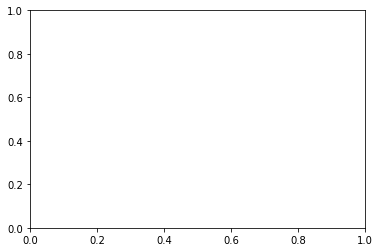

In [123]:
f, ax = plt.subplots(1)

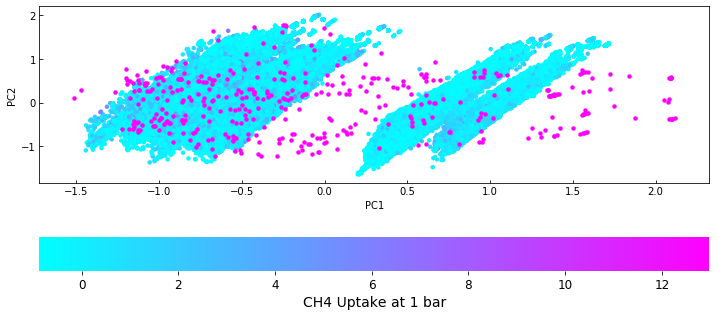

In [130]:
f, ax = plt.subplots(1)

ax.scatter(PC1, PC2, 
            marker='o', 
            c=C, 
            linewidths=0, 
            s=20, 
            alpha=1, 
            cmap=plt.get_cmap('cool'))
ax.scatter(PC1_top, PC2_top, 
            marker='o', 
            c='fuchsia', 
            linewidths=0, 
            s=20, 
            alpha=1)

plt.xlabel('PC1')
plt.ylabel('PC2')

if fp_key_for_coloring != '':
    #cax3 = f.add_axes([0.7, 0.22, 0.25, 0.015])
    #cbar = plt.colorbar(pca_map, cax=cax3, orientation='horizontal', pad=.2)#, ticks=ticks)
    cbar = plt.colorbar(pca_map, orientation='horizontal', pad=.2)#, ticks=ticks)
    cbar.outline.set_linewidth(0)
    cbar.set_label(fp_key_for_coloring, fontsize=14)
    cbar.ax.tick_params(labelsize=12)#, width=0)
    cbar.ax.set_xlabel('CH4 Uptake at 1 bar')

plt.tick_params(axis= 'both', which= 'both', direction= 'in')
f.set_size_inches(12, 5)
#plt.figure(figsize=(6,5))
#plt.tight_layout()
plt.show()
#plt.savefig('./PCA.png', dpi=450)
plt.close()

/home/modules/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


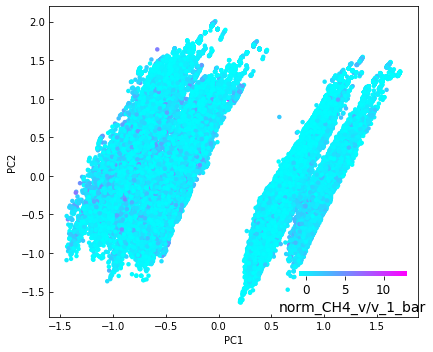

In [87]:

fig = plt.figure(figsize=(6,5))

plt.tick_params(axis= 'both', which= 'both', direction= 'in')
plt.xlabel('PC1')
plt.ylabel('PC2')

#plt.axis('off')  # remove comment to hide axis
###############################################################



###############################################################
PC1 = X_pca_df['PC0']
PC2 = X_pca_df['PC1']
pca_map = plt.scatter(PC1, PC2, 
            marker='o', 
            c=C, 
            linewidths=0, 
            s=20, 
            alpha=1, 
            cmap=plt.get_cmap('cool'))
###############################################################



###############################################################
# Plot colormap
if fp_key_for_coloring != '':
    cax3 = fig.add_axes([0.7, 0.22, 0.25, 0.015])
    cbar = plt.colorbar(pca_map, cax=cax3, orientation='horizontal')#, ticks=ticks)
    cbar.outline.set_linewidth(0)
    cbar.set_label(fp_key_for_coloring, fontsize=14)
    cbar.ax.tick_params(labelsize=12)#, width=0)
###############################################################


plt.tight_layout()
plt.show()
#plt.savefig('PCA.pdf')#, dpi=450)
plt.close()

# Compute KD tree on PC1/PC2

In [37]:
X_pca_df = pcaDF(fp_df, X_heads).iloc[:, 0:2]

Original fingerprint
    Number of dataset = 126384
    Dimension of X    = 415


In [38]:
X_pca_df

,PC0,PC1
0,1.921400,0.460919
1,-0.768220,-0.213106
2,-0.414061,0.062080
3,1.470484,0.415006
4,-1.134066,0.233713
5,-0.431325,-1.199673
6,0.847798,1.192800
7,-0.696856,0.577946
8,-0.108052,-0.993689
9,-0.508898,0.886467


In [39]:
from scipy.spatial import KDTree

In [40]:
import time

In [71]:
start = time.time()
tree = KDTree(X_pca_df)
end = time.time()
print("Time Elapsed: ", end-start)

Time Elapsed:  0.6309397220611572


In [72]:
a = tree.query(X_pca_df, k=2)

KeyboardInterrupt: 

In [ ]:
import numpy as np

In [ ]:
srt = sorted(enumerate(np.max(a[0], axis=1).tolist()), key=lambda x: x[1],reverse=True)

In [ ]:
srt

In [70]:
srt[10000]

(59519, 0.00498724112353504)